# 1. Packages

In [21]:
import numpy as np
from numpy import array, zeros

import os
import time
from tqdm.notebook import tqdm

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from math import floor
from conv_trace import Conv_trace
# from utils import GetFeature, GetPathList, GetPlotDF, GetBalanceTrainArr


In [22]:
# for face detect
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [23]:
from BATCH_DCT_DETECT import DCT_DETECT

In [24]:
dct_detect = DCT_DETECT()

In [3]:
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [5]:
# my_conv_trace = Conv_trace()

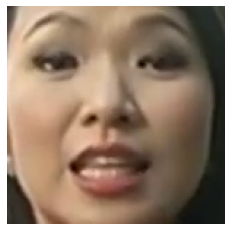

In [6]:
img = plt.imread("/home/re6091054/FF++/raw/train/Real/001/0.png")

face_rects = detector((img*255).astype('uint8'), 0)
for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()

fig=plt.imshow(img[ y1:y2,x1:x2])
plt.axis('off')
plt.savefig('./img.png', bbox_inches='tight',pad_inches = 0)


# 2. Image features

## 2.1. Generate features

In [7]:
train_data_path = "/home/re6091054/FF++/raw/test"

In [8]:
# with open("ff_test_raw.txt", "r") as f:
#     text = f.read()
# text = [sub_text.split(" ") for sub_text in text.split("\n")][:-1]

FileNotFoundError: [Errno 2] No such file or directory: 'ff_test_raw.txt'

In [289]:
Deepfakes = [s for s in text if 'Deepfakes' in s[0]]
Face2Face = [s for s in text if 'Face2Face' in s[0]]
FaceSwap = [s for s in text if 'FaceSwap' in s[0]]
NeuralTextures = [s for s in text if 'NeuralTextures' in s[0]]
Real = [s for s in text if 'Real' in s[0]]

In [290]:
Deepfakes_folder = [train_data_path + "/" + folder_name for folder_name, y in Deepfakes]
Face2Face_folder = [train_data_path + "/" + folder_name for folder_name, y in Face2Face]
FaceSwap_folder = [train_data_path + "/" + folder_name for folder_name, y in FaceSwap]
NeuralTextures_folder = [train_data_path + "/" + folder_name for folder_name, y in NeuralTextures]
Real_folder = [train_data_path + "/" + folder_name for folder_name, y in Real]

In [291]:
len(Deepfakes_folder), len(Face2Face_folder), len(FaceSwap_folder), len(NeuralTextures_folder), len(Real_folder)

(140, 140, 140, 140, 139)

In [292]:
# Deepfakes_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*0)+(720*0):(180*1)+(720*0)]
# Face2Face_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*1)+(720*1):(180*2)+(720*1)]
# FaceSwap_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*2)+(720*2):(180*3)+(720*2)]
# NeuralTextures_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(180*3)+(720*3):(180*4)+(720*3)]
# Real_folder = [train_data_path + "/" + folder_name for folder_name, y in text][(720*4):]

In [293]:
folder_list = [Deepfakes_folder, Face2Face_folder, FaceSwap_folder,  NeuralTextures_folder, Real_folder]

In [294]:
if not os.path.exists("/home/re6091054/FF++/cut/raw/test"):
    os.makedirs("/home/re6091054/FF++/cut/raw/test")

In [295]:
cut_folder_path = "/home/re6091054/FF++/cut/raw/test/"

In [296]:
face_mark = []
folder_path = []
path = './test.txt'
f = open(path, 'w')
video_num =0
for path in Real_folder:
    video_num+=1
    print(video_num)
    num = 0
    face_rects =[]
    path_frame = sorted(os.listdir(path))
    while len(face_rects)==0:
        try:
            img = cv2.imread(os.path.join(path,path_frame[num]))
            face_rects = detector((img*255).astype('uint8'), 0)
            num+=1
            use_frame = os.path.join(path[25:],path_frame[num])
            need_break = 'No'
        except:
            print('No detect', os.path.join(path,path_frame[num]))
            need_break = 'yes'
            break
    if need_break=='yes':
        continue
    else:
        folder_path.append(os.path.join(path[25:],path_frame[num]))
        f.write(os.path.join(path[25:],'{}\n'.format(path_frame[num])))
        face_mark.append(face_rects)
f.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
No detect /home/re6091054/FF++/raw/test/Real/842/list.txt
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
No detect /home/re6091054/FF++/raw/test/Real/851/list.txt
34
35
36
37
38
39
40
41
No detect /home/re6091054/FF++/raw/test/Real/732/list.txt
42
43
44
45
46
No detect /home/re6091054/FF++/raw/test/Real/158/list.txt
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
No detect /home/re6091054/FF++/raw/test/Real/347/list.txt
78
79
80
81
82
83
84
85
86
87
88
89
90
No detect /home/re6091054/FF++/raw/test/Real/932/list.txt
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
No detect /home/re6091054/FF++/raw/test/Real/675/list.txt
130
131
132
133
134
135
136
137
138
139


In [14]:
import pickle
# with open ('test_face_mark_folder_path.pickle','wb') as f:
#     pickle.dump(folder_path, f)
# with open ('test_face_mark.pickle','wb') as f:
#     pickle.dump(face_mark, f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/face_mark_folder_path.pickle', 'rb') as f:
    face_mark_folder_path = pickle.load(f)
with open('/home/re6091054/影像處理與電腦視覺/fianl_compression/pickle/face_mark.pickle', 'rb') as f:
    face_mark = pickle.load(f)

### test

In [12]:
# Deepfakes = face_mark_folder_path
# Face2Face = face_mark_folder_path
# FaceSwap = face_mark_folder_path
# NeuralTextures = face_mark_folder_path
# Real = face_mark_folder_path
# folder_list = [Deepfakes, Face2Face, FaceSwap, NeuralTextures, Real]
# type_name_list = ['Deepfakes', 'Face2Face', 'FaceSwap', 'NeuralTextures', 'Real']

In [13]:
# Deepfakes_face_mark = face_mark
# Face2Face_face_mark = face_mark
# FaceSwap_face_mark = face_mark
# NeuralTextures_face_mark = face_mark
# Real_face_mark = face_mark
# face_mark_list = [Deepfakes_face_mark, Face2Face_face_mark, FaceSwap_face_mark, NeuralTextures_face_mark, Real_face_mark]

### train

In [17]:
Deepfakes = face_mark_folder_path[:172]
Face2Face = face_mark_folder_path[172:172*2]
FaceSwap = face_mark_folder_path[172*2:172*3]
NeuralTextures = face_mark_folder_path[172*3:]
Real = face_mark_folder_path
folder_list = [Deepfakes, Face2Face, FaceSwap, NeuralTextures, Real]
type_name_list = ['Deepfakes', 'Face2Face', 'FaceSwap', 'NeuralTextures', 'Real']

In [18]:
Deepfakes_face_mark = face_mark[:172]
Face2Face_face_mark = face_mark[172:172*2]
FaceSwap_face_mark = face_mark[172*2:172*3]
NeuralTextures_face_mark = face_mark[172*3:]
Real_face_mark = face_mark
face_mark_list = [Deepfakes_face_mark, Face2Face_face_mark, FaceSwap_face_mark, NeuralTextures_face_mark, Real_face_mark]

In [19]:
path_base = '/home/re6091054/FF++/raw/'
cut_folder_path = "/home/re6091054/FF++/cut/raw/test/"

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

ValueError: not enough values to unpack (expected 3, got 2)

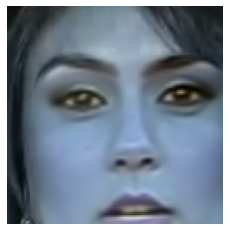

In [25]:
images_list = []
features_list = []
for type_num, folder_type in tqdm(enumerate(folder_list)):
    for frame_num, folder_frame in tqdm(enumerate(folder_type)):
        dataset_type, type_name, video_id, png_id = folder_frame.split('/')
        fake_type_video = os.listdir(os.path.join(path_base,dataset_type, type_name_list[type_num]))
        matching = [s for s in fake_type_video if video_id in s[:3]]
        path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], png_id)
        img = cv2.imread(path)
        diff = 0
        while img is None:
            diff+=1
            path = os.path.join(path_base, dataset_type, type_name_list[type_num], matching[0], str(int(png_id.split('.')[0])-diff)+'.png')
            img = cv2.imread(path)
        face_mark = face_mark_list[type_num][frame_num]
        for i, d in enumerate(face_mark):
            x1 = abs(d.left())
            y1 = abs(d.top())
            x2 = abs(d.right())
            y2 = abs(d.bottom())
        cut_img = img[ y1:y2,x1:x2]
        fig=plt.imshow(cut_img)
        plt.axis('off')
#         if not os.path.exists(os.path.join(cut_folder_path, type_name_list[type_num], matching[0])):
#             os.makedirs(os.path.join(cut_folder_path, type_name_list[type_num], matching[0]))
#         cut_path = os.path.join(cut_folder_path, type_name_list[type_num], matching[0], png_id)
#         plt.savefig(cut_path, bbox_inches='tight',pad_inches = 0)

        images_list.append(cut_img)
        features_list.append(dct_detect.main(cut_img))


In [ ]:
# features_list = []
# images_list = []
# no_de=0
# for folder_type in tqdm(folder_list):
#     for folder_path in tqdm(folder_type):
#         img = cv2.imread(folder_path + "/0.png")
#         face_rects = detector((img*255).astype('uint8'), 0)
        
#         if len(face_rects)==0:
#             img = cv2.imread(folder_path + "/.png")
#             face_rects = detector((img*255).astype('uint8'), 0)
#             no_de+=1
#             print(no_de)
#             print('No face',os.path.join(folder_path,"0.png"))
#         else:
#             for i, d in enumerate(face_rects):
#                 x1 = abs(d.left())
#                 y1 = abs(d.top())
#                 x2 = abs(d.right())
#                 y2 = abs(d.bottom())
#             cut_img = img[ y1:y2,x1:x2]
            
#             fig=plt.imshow(cut_img)
#             plt.axis('off')
#             plt.savefig(os.path.join(cut_folder_path,"0.png"), bbox_inches='tight',pad_inches = 0)
            
#             images_list.append(cut_img)
#             features_list.append(my_conv_trace.get_K(cut_img, kernel_size=3))

In [ ]:
features_arr = np.row_stack(features_list)

response_arr = np.array(
    [1] * len(Real_face_mark) + 
    [0] * len(Real_face_mark)
)

image_type_arr = np.array(
    ["Deepfakes"] * 172 + 
    ["Face2Face"] * 172 + 
    ["FaceSwap"] * 172 + 
    ["NeuralTextures"] * 175 + 
    ["Real"] * len(Real_face_mark)
)

In [ ]:
# test_features_arr = np.row_stack(test_features_list)
# test_response_arr = np.array(
#     [1] * 140 * 4 +
#     [0] * 140
# )
# test_image_type_arr = np.array(
#     ["Deepfakes"] * 140 + 
#     ["Face2Face"] * 140 + 
#     ["FaceSwap"] * 140 + 
#     ["NeuralTextures"] * 140 + 
#     ["Real"] * 140
# )

In [260]:
features_arr.shape

(132, 24)

In [ ]:
np.save("data/Cut_test_features_Conv_trace.npy", features_arr)
np.save("data/Cut_test_response.npy", response_arr)
np.save("data/Cut_test_image_type.npy", image_type_arr)

## 2.2. Load features

In [253]:
# features_arr = np.load("data/Cut_train_features_Conv_trace.npy")
# response_arr = np.load("data/Cut_train_response.npy")
# image_type_arr = np.load("data/Cut_train_image_type.npy")

In [207]:
features_arr.shape, response_arr.shape, image_type_arr.shape

((1382, 24), (1382,), (1382,))

# 3. Visualization

In [30]:
# data_df = pd.concat([pd.DataFrame(features_arr), pd.DataFrame(image_type_arr)], axis=1)

In [31]:
# data_df.columns = [str(i) for i in range(63)] + ['type']

In [32]:
# plt.figure(figsize=(15,5))
# ax = pd.plotting.parallel_coordinates(
#     frame=data_df,
#     class_column='type',
#     cols=[str(i) for i in range(63)],
#     color=["green", "red", "blue", "purple", "lightblue"], axvlines=False,
# )
# ax.set_xlabel("AC coefficients", size=15)
# ax.set_ylabel("Magnitude", size=15)
# plt.tight_layout()
# plt.show()

In [33]:
# plt.figure(figsize=(15,5))
# ax = pd.plotting.parallel_coordinates(
#     frame=data_df[data_df['type'] != "Real"],
#     class_column='type',
#     cols=[str(i) for i in range(63)],
#     color=["green", "darkred", "blue", "orange"], axvlines=False,
# )
# ax.set_xlabel("AC coefficients", size=15)
# ax.set_ylabel("Magnitude", size=15)
# plt.tight_layout()
# plt.show()

# 5. Classifier

In [208]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

## 5.1. Logistic regression

In [209]:
l_reg = LogisticRegression(penalty='l2', max_iter=2000)
l_reg.fit(features_arr, response_arr)

LogisticRegression(max_iter=2000)

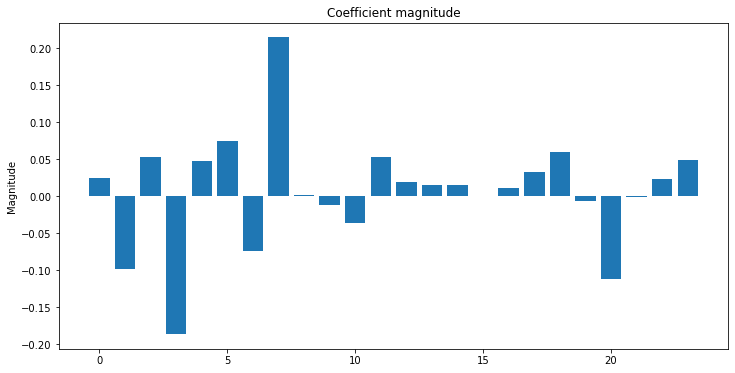

In [211]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(list(range(24)), l_reg.coef_.reshape(-1))
ax.set_ylabel("Magnitude")
ax.set_title("Coefficient magnitude")
plt.show()

## 5.3. Xgboost

### 5.3.1. Data

In [212]:
xg_train = xgb.DMatrix(features_arr, response_arr)

### 5.3.2. Model

In [213]:
params = {'objective':'binary:logistic', 'eval_metric':'logloss'}
xgb_model = xgb.train(params, xg_train) # , 30, xgb_model=None

In [218]:
xgb_model.predict(xg_train)

array([0.6703685 , 0.74092823, 0.4923989 , ..., 0.4322367 , 0.32685715,
       0.4262098 ], dtype=float32)

In [177]:
# weight_ratio = float(len(train_y_001_array[train_y_001_array == 0])) / float(len(train_y_001_array[train_y_001_array == 1]))
# w_array = np.array([weight_ratio] * train_y_001_array.shape[0])
# w_array[train_y_001_array == 0] = 1- weight_ratio

# xgb_model.fit(X=train_x_001_array, y=train_y_001_array.astype(int), sample_weight=w_array)

In [215]:
# print("Testing ACC: ", round(accuracy_score(train_y_1, xgb_model.predict(train_x_1)), 4))
# print("Testing Confusion matrix: \n", confusion_matrix(train_y_1, xgb_model.predict(train_x_1)))

NameError: name 'train_y_1' is not defined

# 6. Test

In [23]:
test_data_path = '/home/re6091054/FF++/c40/test'

In [24]:
image_types = sorted(os.listdir(test_data_path))

In [ ]:
face_mark = []
folder_path = []
path = './train.txt'
f = open(path, 'w')
video_num =0
for path in Real_folder:
    video_num+=1
    print(video_num)
    num = 0
    face_rects =[]
    path_frame = sorted(os.listdir(path))
    while len(face_rects)==0:
        try:
            img = cv2.imread(os.path.join(path,path_frame[num]))
            face_rects = detector((img*255).astype('uint8'), 0)
            num+=1
            use_frame = os.path.join(path[25:],path_frame[num])
            need_break = 'No'
        except:
            print('No detect', os.path.join(path,path_frame[num]))
            need_break = 'yes'
            break
    if need_break=='yes':
        continue
    else:
        folder_path.append(os.path.join(path[25:],path_frame[num]))
        f.write(os.path.join(path[25:],'{}\n'.format(path_frame[num])))
        face_mark.append(face_rects)
f.close()

In [ ]:
test_features_list = []
imags_list = []
for img_typ in tqdm(image_types):
    type_name = test_data_path + "/" + img_typ
    folders_list = os.listdir(type_name) 
    for folder in tqdm(folders_list):
        folder_name = type_name + "/" + folder
        img = cv2.imread(folder_name + "/0.png")
        imags_list.append(img)
        test_features_list.append(my_conv_trace.get_K(img, kernel_size=3))

In [25]:
test_features_list = []
imags_list = []
for img_typ in tqdm(image_types):
    type_name = test_data_path + "/" + img_typ
    folders_list = os.listdir(type_name) 
    for folder in tqdm(folders_list):
        folder_name = type_name + "/" + folder
        img = cv2.imread(folder_name + "/0.png")
        imags_list.append(img)
        test_features_list.append(my_conv_trace.get_K(img, kernel_size=3))

In [28]:
# list(map(lambda x: x.shape, test_features_list))

In [26]:
test_features_arr = np.row_stack(test_features_list)
test_response_arr = np.array(
    [1] * 140 * 4 +
    [0] * 140
)
test_image_type_arr = np.array(
    ["Deepfakes"] * 140 + 
    ["Face2Face"] * 140 + 
    ["FaceSwap"] * 140 + 
    ["NeuralTextures"] * 140 + 
    ["Real"] * 140
)

In [29]:
np.save("data/test_features_conv_trace_arr.npy", test_features_arr)
np.save("data/test_response_arr.npy", test_response_arr)
np.save("data/test_image_type_arr.npy", test_image_type_arr)

In [183]:
test_features_arr = np.load("data/test_features_arr.npy")
test_response_arr = np.load("data/test_response_arr.npy")
test_image_type_arr = np.load("data/test_image_type_arr.npy")

In [184]:
xg_test = xgb.DMatrix(test_features_arr, test_response_arr)

In [189]:
test_pred_prob = xgb_model.predict(xg_test)
test_pred = np.round(test_pred_prob)

In [200]:
print("Testing ACC: ", round(accuracy_score(test_pred, test_response_arr), 4), "\n")
print("Testing confusion matrix: \n", confusion_matrix(test_pred, test_response_arr), "\n")

fpr, tpr, thresholds = roc_curve(test_response_arr, test_pred_prob, pos_label=1)
print("Testing AUC", round(auc(fpr, tpr), 4), "\n")

Testing ACC:  0.5286 

Testing confusion matrix: 
 [[ 55 245]
 [ 85 315]] 

Testing AUC 0.516 

